In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cholera = pd.read_csv('../data/cholera-dataset.csv', index_col = 0)

In [3]:
cholera.sample(5)

,age,sex,dh,rbp,c,seizures,vc,ga,bt0,fc,exposed_to,fever,cholera
282,59,Male,2,126,218.0,1,1,134,0,1,1,0,0
64,58,Male,2,140,211.0,1,0,165,0,2,0,0,1
143,67,Female,0,106,223.0,0,1,142,0,2,2,0,1
301,57,Male,0,130,131.0,0,1,115,1,1,1,0,0
164,38,Male,2,138,175.0,0,1,173,0,2,4,0,1


In [4]:
cholera.dtypes

age             int64
sex            object
dh              int64
rbp             int64
c             float64
seizures        int64
vc              int64
ga              int64
bt0             int64
fc              int64
exposed_to      int64
fever           int64
cholera         int64
dtype: object

In [5]:
cholera.isnull().sum()

age           0
sex           0
dh            0
rbp           0
c             5
seizures      0
vc            0
ga            0
bt0           0
fc            0
exposed_to    0
fever         0
cholera       0
dtype: int64

In [6]:
cholera.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 13 columns):
age           303 non-null int64
sex           303 non-null object
dh            303 non-null int64
rbp           303 non-null int64
c             298 non-null float64
seizures      303 non-null int64
vc            303 non-null int64
ga            303 non-null int64
bt0           303 non-null int64
fc            303 non-null int64
exposed_to    303 non-null int64
fever         303 non-null int64
cholera       303 non-null int64
dtypes: float64(1), int64(11), object(1)
memory usage: 33.1+ KB


In [7]:
to_drop = cholera[cholera['c'].isnull() == True] #NaN values on c (cholesterol levels)

In [8]:
cholera.drop(to_drop.index, inplace = True)

In [20]:
cholera = cholera.drop(columns = ['fever'], axis = 1)

In [21]:
cholera.head()

,age,sex,dehyd_lev,blood_pres,cholesterol,seizures,vomit_col,gastric_acid,O_bloodtype_bool,fec_cons,exposed_to,cholera
2,41,Female,1,130,204.0,0,0,172,0,2,0,1
3,56,Male,1,120,236.0,0,1,178,0,2,0,1
4,57,Female,0,120,354.0,0,1,163,1,2,0,1
5,57,Male,0,140,192.0,0,1,148,0,1,0,1
6,56,Female,1,140,294.0,0,0,153,0,1,0,1


We change the column name

In [22]:
cholera.rename(columns = {'dh': 'dehyd_lev', 'rbp': 'blood_pres', 'c':'cholesterol', 'vc':'vomit_col', 'ga': 'gastric_acid', 'bt0':'O_bloodtype_bool', 'fc':'fec_cons'}, inplace = True)

In [23]:
cholera.head()

,age,sex,dehyd_lev,blood_pres,cholesterol,seizures,vomit_col,gastric_acid,O_bloodtype_bool,fec_cons,exposed_to,cholera
2,41,Female,1,130,204.0,0,0,172,0,2,0,1
3,56,Male,1,120,236.0,0,1,178,0,2,0,1
4,57,Female,0,120,354.0,0,1,163,1,2,0,1
5,57,Male,0,140,192.0,0,1,148,0,1,0,1
6,56,Female,1,140,294.0,0,0,153,0,1,0,1


In [24]:
cholera.describe()

,age,dehyd_lev,blood_pres,cholesterol,seizures,vomit_col,gastric_acid,O_bloodtype_bool,fec_cons,exposed_to,cholera
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,54.024823,0.968085,129.957447,241.851064,0.134752,0.528369,149.542553,0.322695,1.418440,0.734043,0.546099
std,9.942687,1.027578,15.539582,45.331980,0.342065,0.520994,22.726910,0.468338,0.604326,1.021222,0.498755
min,3.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,120.000000,209.000000,0.000000,0.000000,132.250000,0.000000,1.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.000000,0.000000,1.000000,0.000000,1.000000
75%,60.000000,2.000000,140.000000,271.000000,0.000000,1.000000,167.750000,1.000000,2.000000,1.000000,1.000000
max,100.000000,3.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,2.000000,4.000000,1.000000


In [25]:
cholera[cholera['exposed_to']==4] #It is not harmful to have different 4, but it's important to aknlowledge it.

,age,sex,dehyd_lev,blood_pres,cholesterol,seizures,vomit_col,gastric_acid,O_bloodtype_bool,fec_cons,exposed_to,cholera
92,52,Male,2,138,223.0,0,1,169,0,2,4,1
158,58,Male,1,125,220.0,0,1,144,0,1,4,1
163,38,Male,2,138,175.0,0,1,173,0,2,4,1
164,38,Male,2,138,175.0,0,1,173,0,2,4,1
251,43,Male,0,132,247.0,1,0,143,1,1,4,0


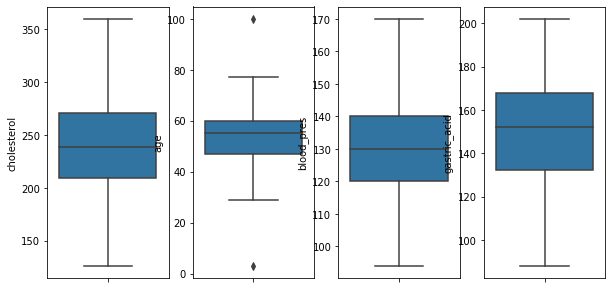

In [26]:
fig, ax = plt.subplots(1,4, figsize = (10,5))
sns.boxplot(y = cholera.cholesterol, ax=ax[0])
sns.boxplot(y = cholera.age, ax=ax[1])
sns.boxplot(y = cholera.blood_pres, ax=ax[2])
sns.boxplot(y = cholera.gastric_acid, ax = ax[3])

plt.show()
#We have found some outliers so we have decided to drop them.

In [27]:
rows_to_drop = cholera.loc[(cholera.cholesterol > 380) | (cholera.blood_pres > 170) | (cholera.gastric_acid < 80) ].copy()
rows_to_drop

,age,sex,dehyd_lev,blood_pres,cholesterol,seizures,vomit_col,gastric_acid,O_bloodtype_bool,fec_cons,exposed_to,cholera


In [28]:
cholera.drop(rows_to_drop.index, inplace = True)

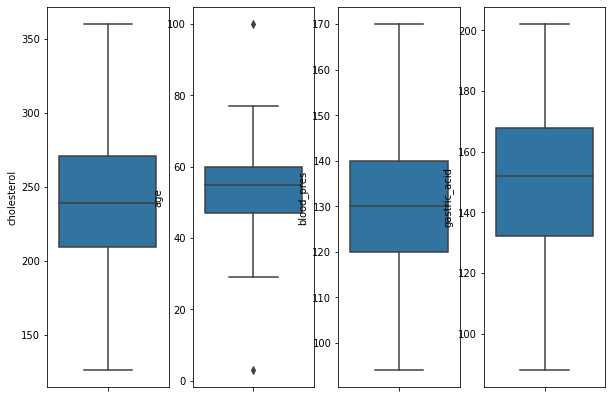

In [29]:
fig, ax = plt.subplots(1,4, figsize = (10,7))
sns.boxplot(y = cholera.cholesterol, ax=ax[0])
sns.boxplot(y = cholera.age, ax=ax[1])
sns.boxplot(y = cholera.blood_pres, ax=ax[2])
sns.boxplot(y = cholera.gastric_acid, ax = ax[3])

plt.show()

In [31]:
cholera.to_csv('../data/cholera_clean.csv')